In [1]:
import time
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave

%reload_ext autoreload
%autoreload 2

from kymographs import KymoSpider

Populating the interactive namespace from numpy and matplotlib


# Loading data
_Note:_ The example below loads multiple exportet stacks and concatenates them. At the end the only variable that need to be set to something meaningful have to be `stack`, `seg`, and `flow`. The data for these variables you can generate as can be seen in `TimeLapseData2d` at the very bottom. (This was true when I wrote this text... ;)

In [2]:
# folder = '/Users/markslabodnick/Dropbox/Bobseg/Results/20170428/export/'
folder = '/Users/jug/Repositories/GIT/BobSeg/export/'


stack1 = imread(folder+'stack01.tiff')
stack1 = np.swapaxes(stack1,0,1)
# stack2 = imread(folder+'stack02.tiff')
# stack2 = np.swapaxes(stack2,0,1)
# stack = np.concatenate([stack1,stack2],axis=1)
stack = stack1

seg1 = imread(folder+'seg01.tiff')
# seg2 = imread(folder+'seg02.tiff')
# seg = np.concatenate([seg1,seg2])
seg = seg1

flow1 = imread(folder+'flow01.tiff')
flow1 = np.swapaxes(flow1,0,1)
# flow2 = imread(folder+'flow02.tiff')
# flow2 = np.swapaxes(flow2,0,1)
# flow = np.concatenate([flow1,flow2],axis=1)
flow = flow1

# Create the KymoSpider object

In [3]:
# Parameters are (default number of legs is 8): 
# -- leg length in pixels
# -- (x,y)-tuple defining the kymo spider's center point in the image
# -- optional parameter rotation in degrees (convention: make leg 1 point towards the Ea/Ep interface!)
ks = KymoSpider(90,(185,265),rotation=160)
#ks.set_leg_number(5, rotation=45)
ks.set_leg_angles([15,75,125,180,225,310])

### Check if the created spider is placed sinsibly
_Note:_ you will be shown the first and the last loaded frame AND the whole thing will only work if the spider does fit within the image entirely!

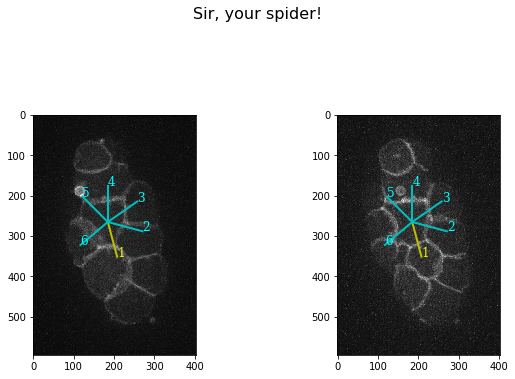

In [4]:
pylab.rcParams['figure.figsize'] = (10, 15)
fig = plt.figure()
ks.plot_spider_loc_on_images(fig,stack[1],flow)

# Compute Kymographs and Plot Data

[52, 48, 47, 46, 46, 46, 46, 46, 46, 43, 42, 42, 41, 44, 43, 43, 41, 42, 43, 42, 43, 42, 41, 42, 43, 47, 47, 47, 47, 47, 47, 48, 50, 51, 52, 54, 54, 54, 53, 54, 54, 56, 57, 56, 54, 53, 52, 51, 50, 49]
52


IndexError: index 52 is out of bounds for axis 1 with size 50

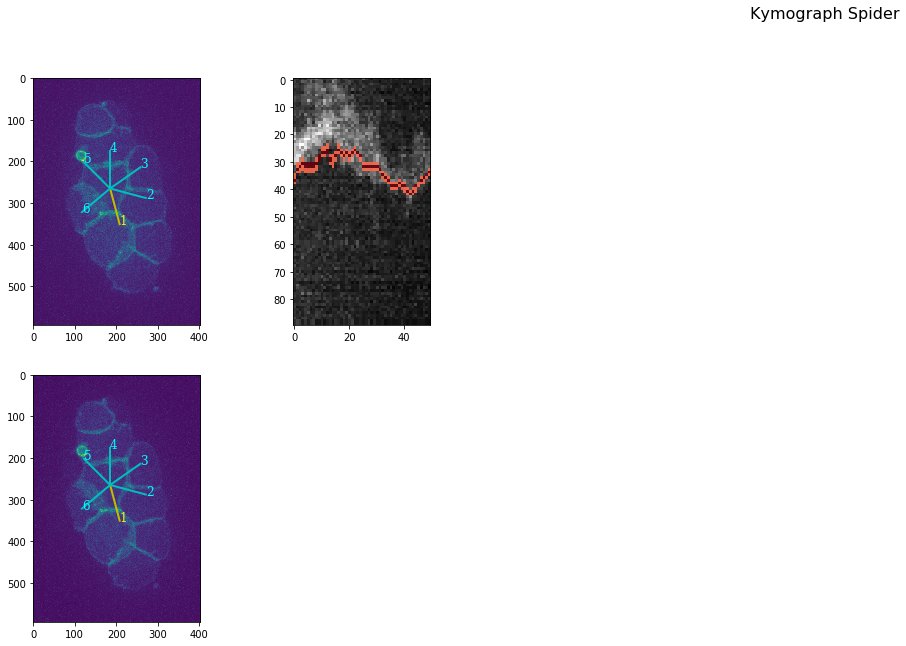

In [5]:
ks.compute(stack[1],stack[0],seg,flow)

# Plotting from here on...
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig = plt.figure()
ks.plot(fig,stack[1][0],stack[1][1],15,True)

# Use the next line if you want to save the plot to disc
#fig.savefig('/Users/jug/Desktop/muh.png')

### Plotting column flow stats

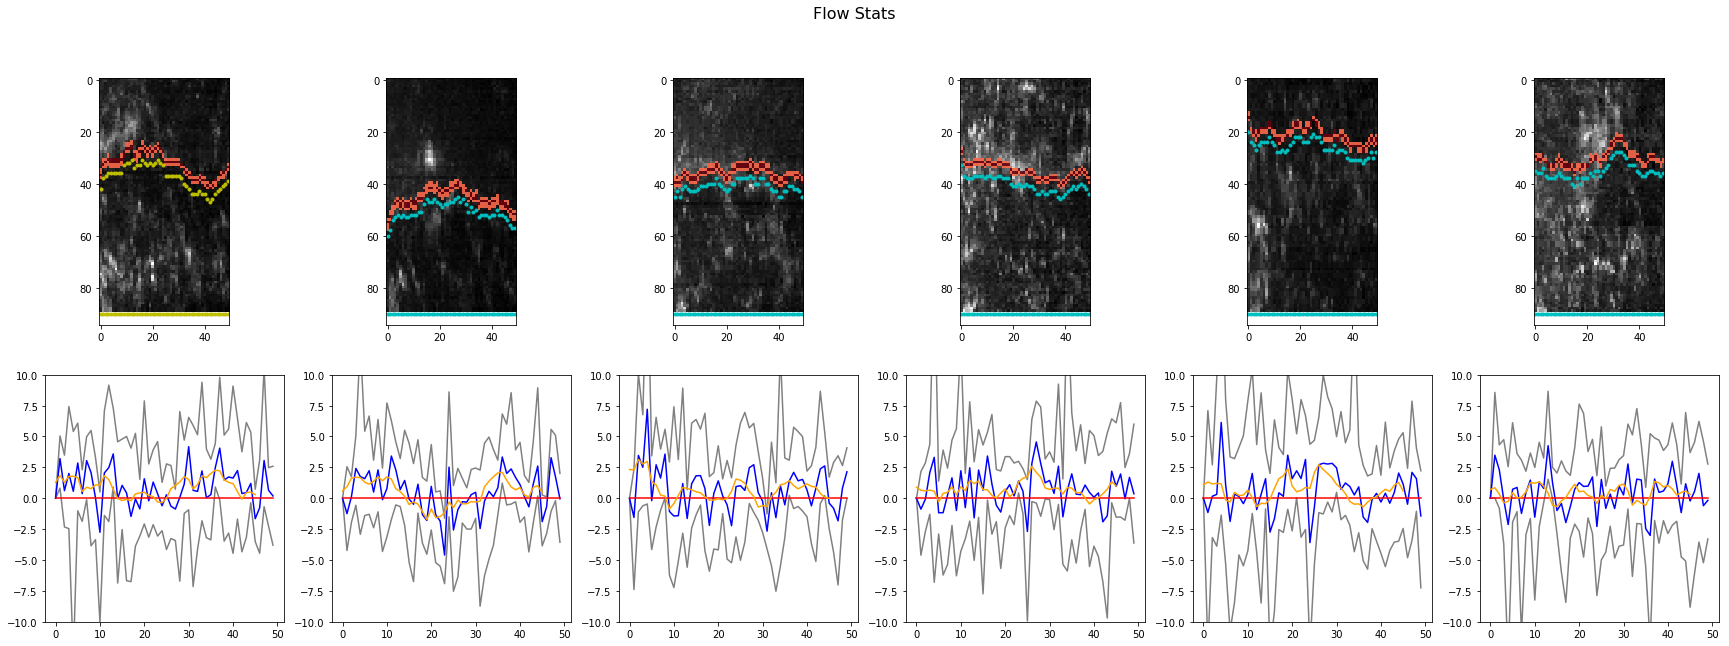

In [6]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_stats = plt.figure()
ks.plot_column_flow_stats(fig_stats, offset_from_membrane=5, length=None)

ValueError: invalid literal for int() with base 10: '*'

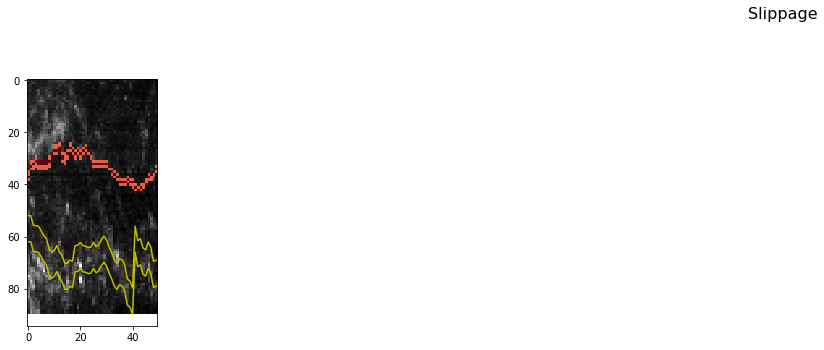

In [7]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_slip = plt.figure()
(s, ss) = ks.plot_slippage(fig_slip, delta_t=5, offset_from_membrane=15, length=10, move_window=True, smoothing_width=5)

In [8]:
# get the y-values of the k-th legs blue line
k=0
s[k][1]

NameError: name 's' is not defined

# Export data to CSV file

In [22]:
start_time = 0       # absolute time of first frame in minutes
pixel_size = 0.1144  # this is microns per pixel
delta_t = 6.22/60    # minutes per frame

# TODO export also micrometer based outputs

data_filename = folder+'data.jug'
str_now = datetime.datetime.now().strftime("%B %d, %Y at %I:%M%p")

with open(data_filename, "w") as data_file:
    data_file.write("# Exported after processing from folder '%s' on %s\n\n" % (folder,str_now))
    for legnum in range(len(s)):
        data_file.write("legnum, %d\n"%legnum)
        data_file.write("t [pixel], %s\n"%s[legnum][0])
        data_file.write("s [pixel], %s\n"%s[legnum][1])        
        data_file.write("t [min], %s\n"%s[legnum][0]) TODO (note: absolute time!!!)
        data_file.write("s [um/min], %s\n"%s[legnum][1]) TODO 

SyntaxError: invalid syntax (<ipython-input-22-bfa6812a289c>, line 16)